In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("library_usage.csv")
data.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,NaN,NaN,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016.0,z,email,True,2010,False,4.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,NaN,NaN,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,NaN,NaN,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016.0,z,email,True,2003,False,2.0


In [4]:
#Para filtrar datos en un data frame segun alguna condicion
data_filter= data.loc[data["Total Checkouts"]>=1,:]
data_filter.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016.0,z,email,True,2010,False,4.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016.0,z,email,True,2003,False,2.0
6,0,ADULT,3002,1689,25 to 34 years,P5,Portola,July,2016.0,p,phone,True,2004,False,9.0
7,0,ADULT,4,0,25 to 34 years,C2,Chinatown,July,2014.0,p,phone,True,2014,False,5.0
8,0,ADULT,20,0,25 to 34 years,S7,Sunset,June,2015.0,z,email,True,2011,False,7.0


In [6]:
group_data=data_filter.groupby("Patron Type Definition")
count_group=group_data["Patron Type Definition"].count()
count_group

Patron Type Definition
ADULT                  224828
AT USER ADULT             299
AT USER JUVENILE           42
AT USER SENIOR             55
AT USER TEEN               33
AT USER WELCOME            23
BOOKS BY MAIL              83
DIGITAL ACCESS CARD       123
FRIENDS FOR LIFE           30
JUVENILE                53945
RETIRED STAFF             156
SENIOR                  34817
SPECIAL                   928
STAFF                     835
TEACHER CARD             1555
VISITOR                   369
WELCOME                  7711
YOUNG ADULT             24038
Name: Patron Type Definition, dtype: int64

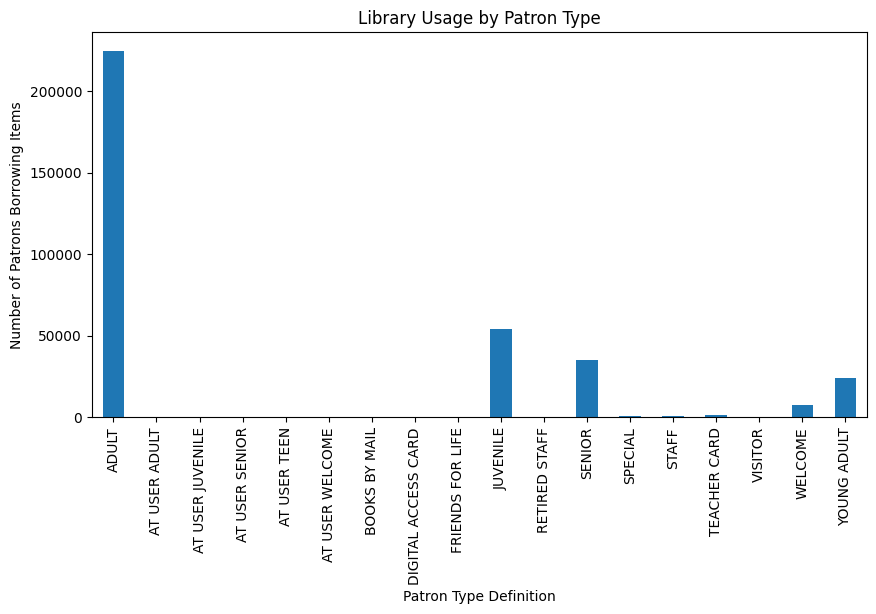

In [10]:
#Como hacer un grafico de barra en panda o en
count_group.plot(kind="bar",
                 title="Library Usage by Patron Type",
                 xlabel="Patron Type Definition",
                 ylabel="Number of Patrons Borrowing Items",
                 figsize=(10,5))
plt.show()

In [14]:
group_data_2=data_filter.groupby(["Home Library Definition","Patron Type Definition"])
count_group_2=group_data_2["Total Checkouts"].sum()
count_group_2.head()

Home Library Definition  Patron Type Definition
Anza                     ADULT                     855994
                         AT USER ADULT                131
                         AT USER JUVENILE              77
                         AT USER TEEN                  45
                         DIGITAL ACCESS CARD            4
Name: Total Checkouts, dtype: int64

In [18]:
branch="Anza"
min_checkouts= 5000

just_one_branch=count_group_2.loc[branch]
just_one_branch=just_one_branch.loc[just_one_branch["Total Checkouts"]>min_checkouts,:]

branch_pie = just_one_branch.plot(kind="pie", y="Total Checkouts", title=("Loans of " + branch + 
                                                                          " Branch for Patron Types Over "
                                                                         + str(min_checkouts) + " Loaned Items"))
branch_pie.set_ylabel("Branch Checkouts")

plt.axis("equal")
plt.show()

KeyError: 'Total Checkouts'